<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-setup-models" data-toc-modified-id="Import-and-setup-models-1">Import and setup models</a></span></li><li><span><a href="#Embedding-all-attributes" data-toc-modified-id="Embedding-all-attributes-2">Embedding all attributes</a></span></li><li><span><a href="#Embedding-few-attributes" data-toc-modified-id="Embedding-few-attributes-3">Embedding few attributes</a></span></li><li><span><a href="#Trying-first-300-rows" data-toc-modified-id="Trying-first-300-rows-4">Trying first 300 rows</a></span></li></ul></div>

# Import and setup models

In [22]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from embedding_algorithms.inferSent import set_RNN_embedding, tuple_inferSent_embedding, RNN_embedding
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction
from preprocessing_datasets.preprocessing_utilities import get_labels_by
from cluster_algorithms.hierarchy_cluster import *
from preprocessing_datasets import load_dataset

In [14]:
dataset_name, table, pairs = load_dataset({'dataset':'cora', 'cluster_method': 'hierarchy', 'verbose': 1, 'embedding_type': 'infersent'})

#####################################################################
CURRENT dataset:        cora
CURRENT cluster_method: hierarchy
CURRENT embedding_type: infersent
#####################################################################


In [4]:
start = time.time()
set_RNN_embedding("bilstm", False, 2, 2048, 1)
print("TIME: {0}".format(time.time() - start))

Vocab size : 2196017
TIME: 166.4692840576172


In [5]:
labels = get_labels_by('../source_datasets/cora/cora.csv', 'class')

In [6]:
import random
def random_color(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    return r,g,b

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

In [7]:
dic = {}
count = 5

chosen_labels = []
remove_index = []
colors = {}
init_color = 1

for i in range(len(labels)):
    if labels[i] not in dic.keys():
        dic[labels[i]] = 1
        r, g, b = random_color(init_color)
        colors[labels[i]] = rgb2hex(r,g,b)
        init_color = init_color + 1
    elif dic[labels[i]] < count:
        dic[labels[i]] = dic[labels[i]] + 1
    else: 
        remove_index.append(i)
        continue
    chosen_labels.append(labels[i])
 
    
table = table.drop(remove_index)

# Embedding all attributes

In [66]:
embeddings_tokens = RNN_embedding(table, [], "bilstm", False)
embeddings_tokens = np.array(embeddings_tokens)

all attributes used


In [67]:
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=40,
    method="barnes_hut")

starting dimension: 4096
setting TSNE with n_components: 2 & perplexity: 40


rows: 420
classes: 112


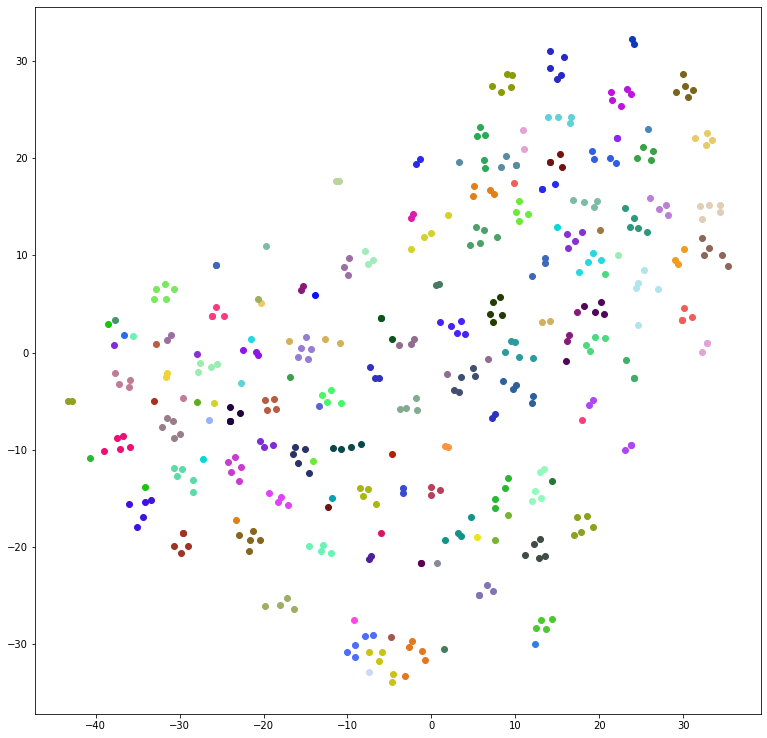

In [68]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(colors)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i], c=colors[chosen_labels[i]])
    # plt.annotate(i,
    #         xy=(x[i], y[i]),
    #         xytext=(5, 2),
    #         textcoords='offset points',
    #         ha='right',
    #         va='bottom')
plt.show()

clustering with NUM_CLUSTERS = 10, 


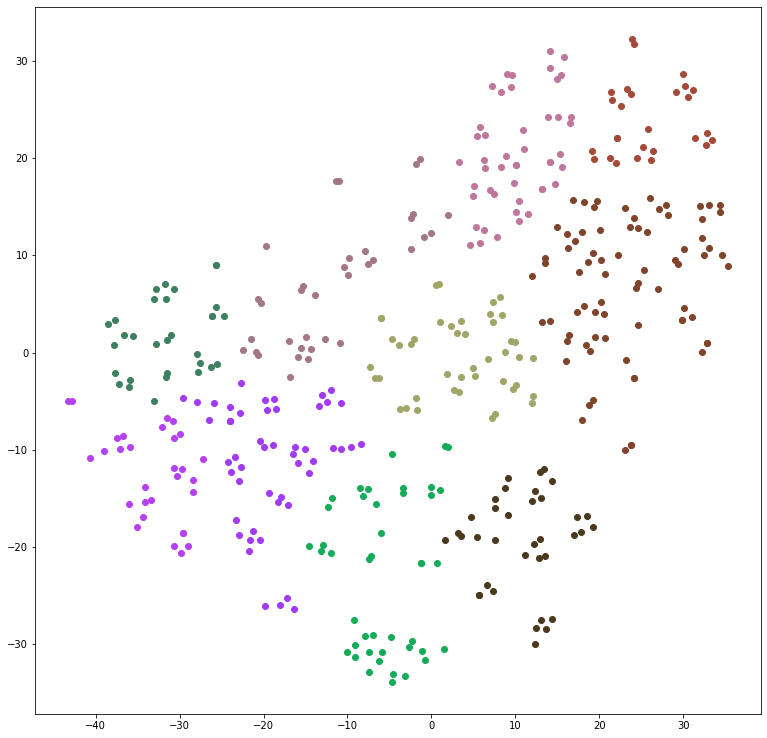

In [69]:
num_clusters = 10
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        #plt.annotate(colors[chosen_labels[e]],
        #             xy=(x[e], y[e]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')

plt.show()

# Embedding few attributes

In [46]:
embeddings_tokens = RNN_embedding(table, ['author', 'title'], "bilstm", False)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['author', 'title']


In [47]:
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    verbose=1,
    perplexity=40,
    method="barnes_hut")

starting dimension: 4096
setting TSNE with n_components: 2 & perplexity: 40


In [48]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(colors)))

rows: 420
classes: 112


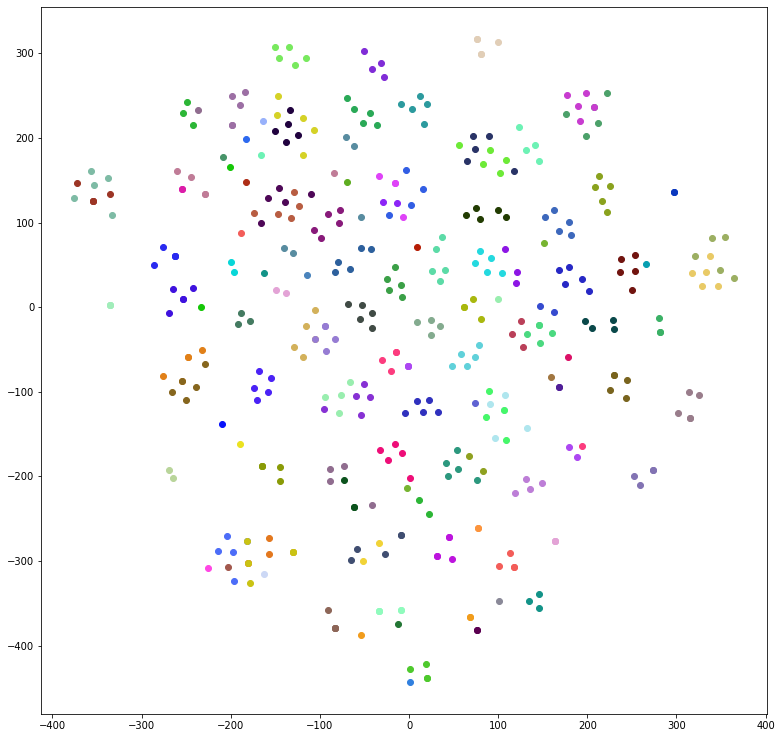

In [55]:
plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i], c=colors[chosen_labels[i]])
    # plt.annotate(i,
    #         xy=(x[i], y[i]),
    #         xytext=(5, 2),
    #         textcoords='offset points',
    #         ha='right',
    #         va='bottom')
plt.show()

In [56]:
num_clusters = 10
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})

clustering with NUM_CLUSTERS = 10, 


In [57]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])


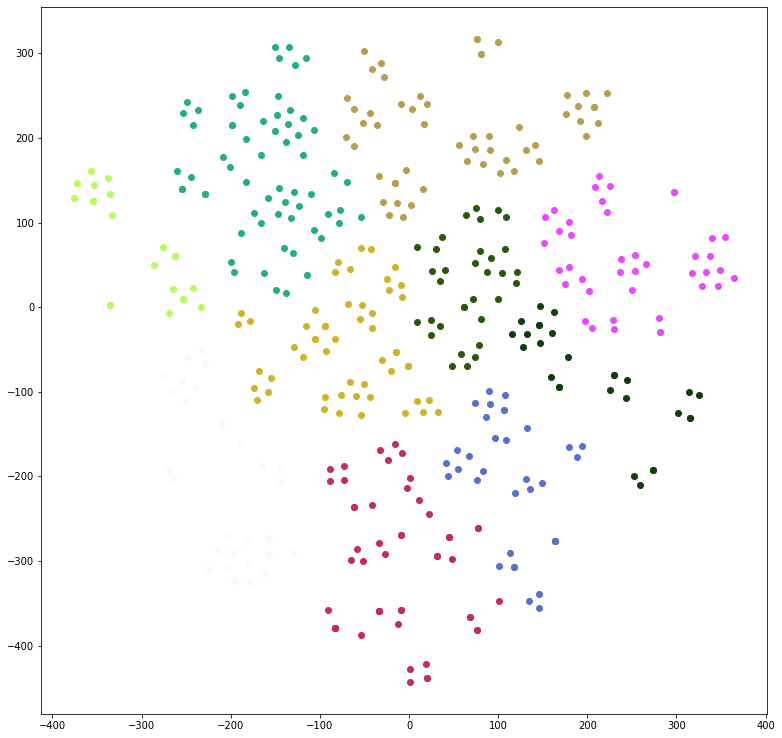

In [65]:
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        #plt.annotate(colors[chosen_labels[e]],
        #             xy=(x[e], y[e]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')

plt.show()

# Trying first 300 rows

In [15]:
dic = {}
count = 30 # 15 cesa have two title very different

chosen_labels = []
remove_index = []
colors = {}
init_color = 1

for i in range(len(labels)):
    if i > 300:
        remove_index.append(i)
        continue
    elif labels[i] not in dic.keys():
        dic[labels[i]] = 1
        r, g, b = random_color(init_color)
        colors[labels[i]] = rgb2hex(r,g,b)
        init_color = init_color + 1
    elif dic[labels[i]] < count:
        dic[labels[i]] = dic[labels[i]] + 1
    else: 
        remove_index.append(i)
        continue
    chosen_labels.append(labels[i])
 
    
table = table.drop(remove_index)

In [16]:
embeddings_tokens = RNN_embedding(table, ['author', 'title'], "bilstm", False)
embeddings_tokens = np.array(embeddings_tokens)

tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=40,
    method="barnes_hut")

attrs: ['author', 'title']
starting dimension: 4096
setting TSNE with n_components: 2 & perplexity: 40
early_exaggeration: 12


In [17]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(colors)))

rows: 247
classes: 20


rows: 247
classes: 20


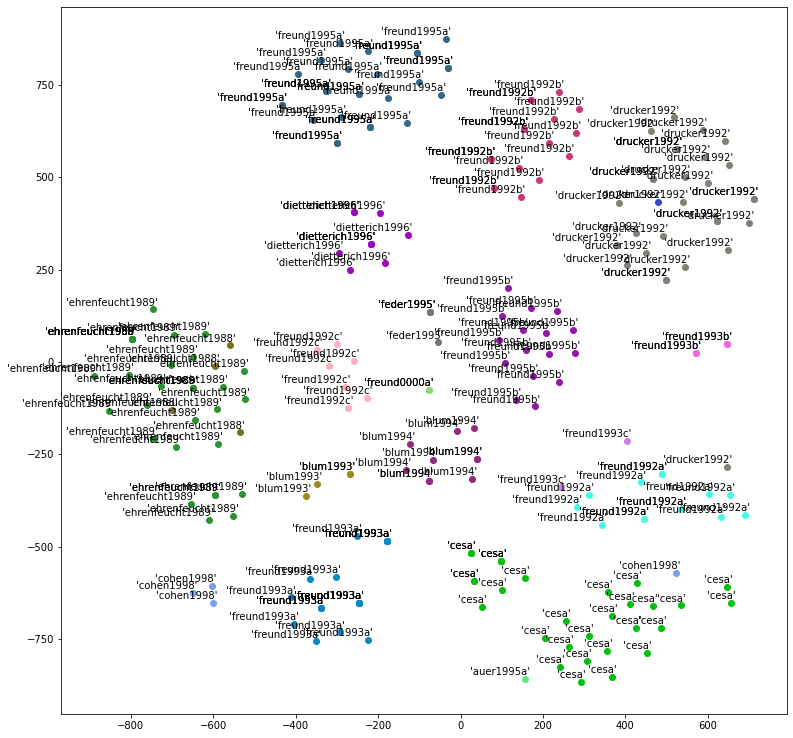

In [18]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(colors)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i], c=colors[chosen_labels[i]])
    plt.annotate(chosen_labels[i],
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

clustering with NUM_CLUSTERS = 3, 


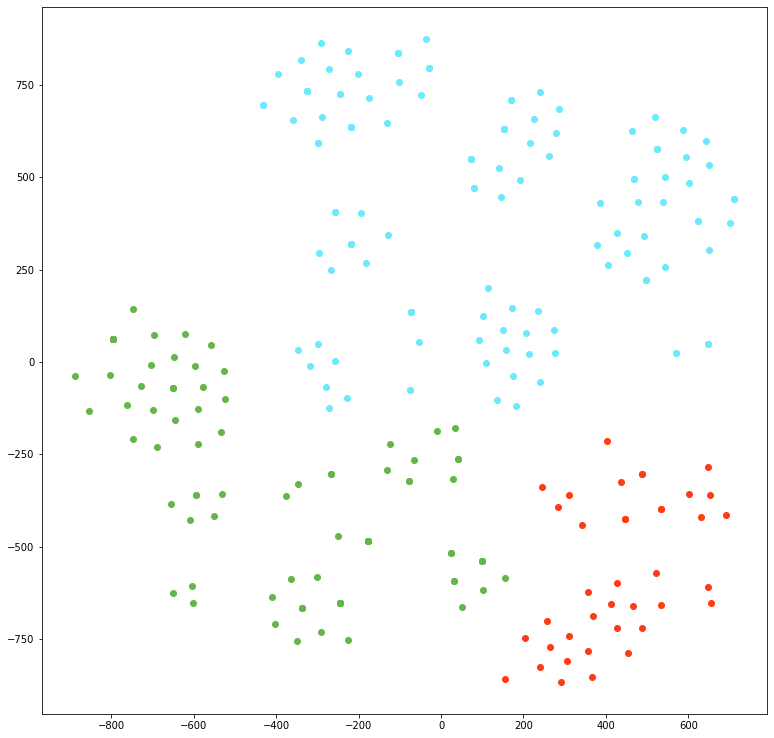

In [23]:
num_clusters = 3
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        #plt.annotate(colors[chosen_labels[e]],
        #             xy=(x[e], y[e]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')

plt.show()